## 0 Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
#plt.rcParams['figure.figsize'] = [20, 20]
random_state = 15

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [5]:
data_url = "/content/drive/MyDrive/ML/Data/exam_2020_01_07_data.csv"
df = pd.read_csv(data_url, sep = ",")
print("Shape of the input data ", df.shape)

Shape of the input data  (1000, 6)


### Pairplot

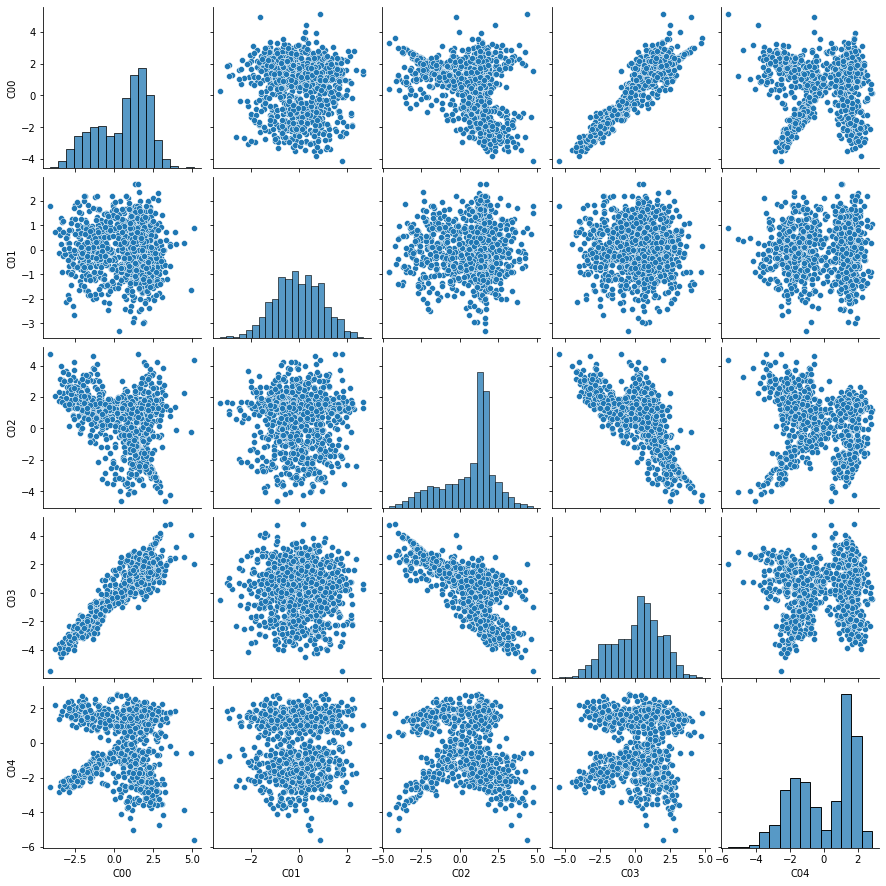

In [6]:
sns.pairplot(df)

## Cross Validation
### Splitting X and y

In [7]:
target = "Class"
X = df.drop(target, axis = 1)
y = df[target]

In [8]:
from sklearn.model_selection import train_test_split

tr_size = 0.7
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size = tr_size, random_state = random_state)
print("There are ",Xtrain.shape[0]," samples in the training dataset")
print("There are ",Xtest.shape[0]," samples in the testing dataset")
print("Each sample has ",Xtrain.shape[1]," features")

There are  700  samples in the training dataset
There are  300  samples in the testing dataset
Each sample has  5  features


In [12]:
model = DecisionTreeClassifier(random_state = random_state)
model.fit(Xtrain, ytrain)
max_fitted_depth = model.tree_.max_depth

In [15]:
parameter_values = range(1, max_fitted_depth + 1)
scores = []
for par in parameter_values:
  estimator = DecisionTreeClassifier(max_depth = par)
  k_val_score = cross_val_score(estimator, Xtrain, ytrain, scoring='accuracy', cv = 5)
  scores.append(np.mean(k_val_score))

#print(scores)

## Creating the model with the best parameter

In [16]:
best_parameter_value = parameter_values[np.argmax(scores)] # return the depth with the best scores 

best_model = DecisionTreeClassifier( max_depth = best_parameter_value )
best_model.fit(Xtrain, ytrain)
ytest_best_model = best_model.predict(Xtest)
accuracy_best_model = accuracy_score(ytest, ytest_best_model) * 100
print("The accuracy on test set tuned with cross_validation is", round(accuracy_best_model,2),"% with depth ",best_parameter_value)

The accuracy on test set tuned with cross_validation is 89.67 % with depth  13


## Plotting Optimal parameter

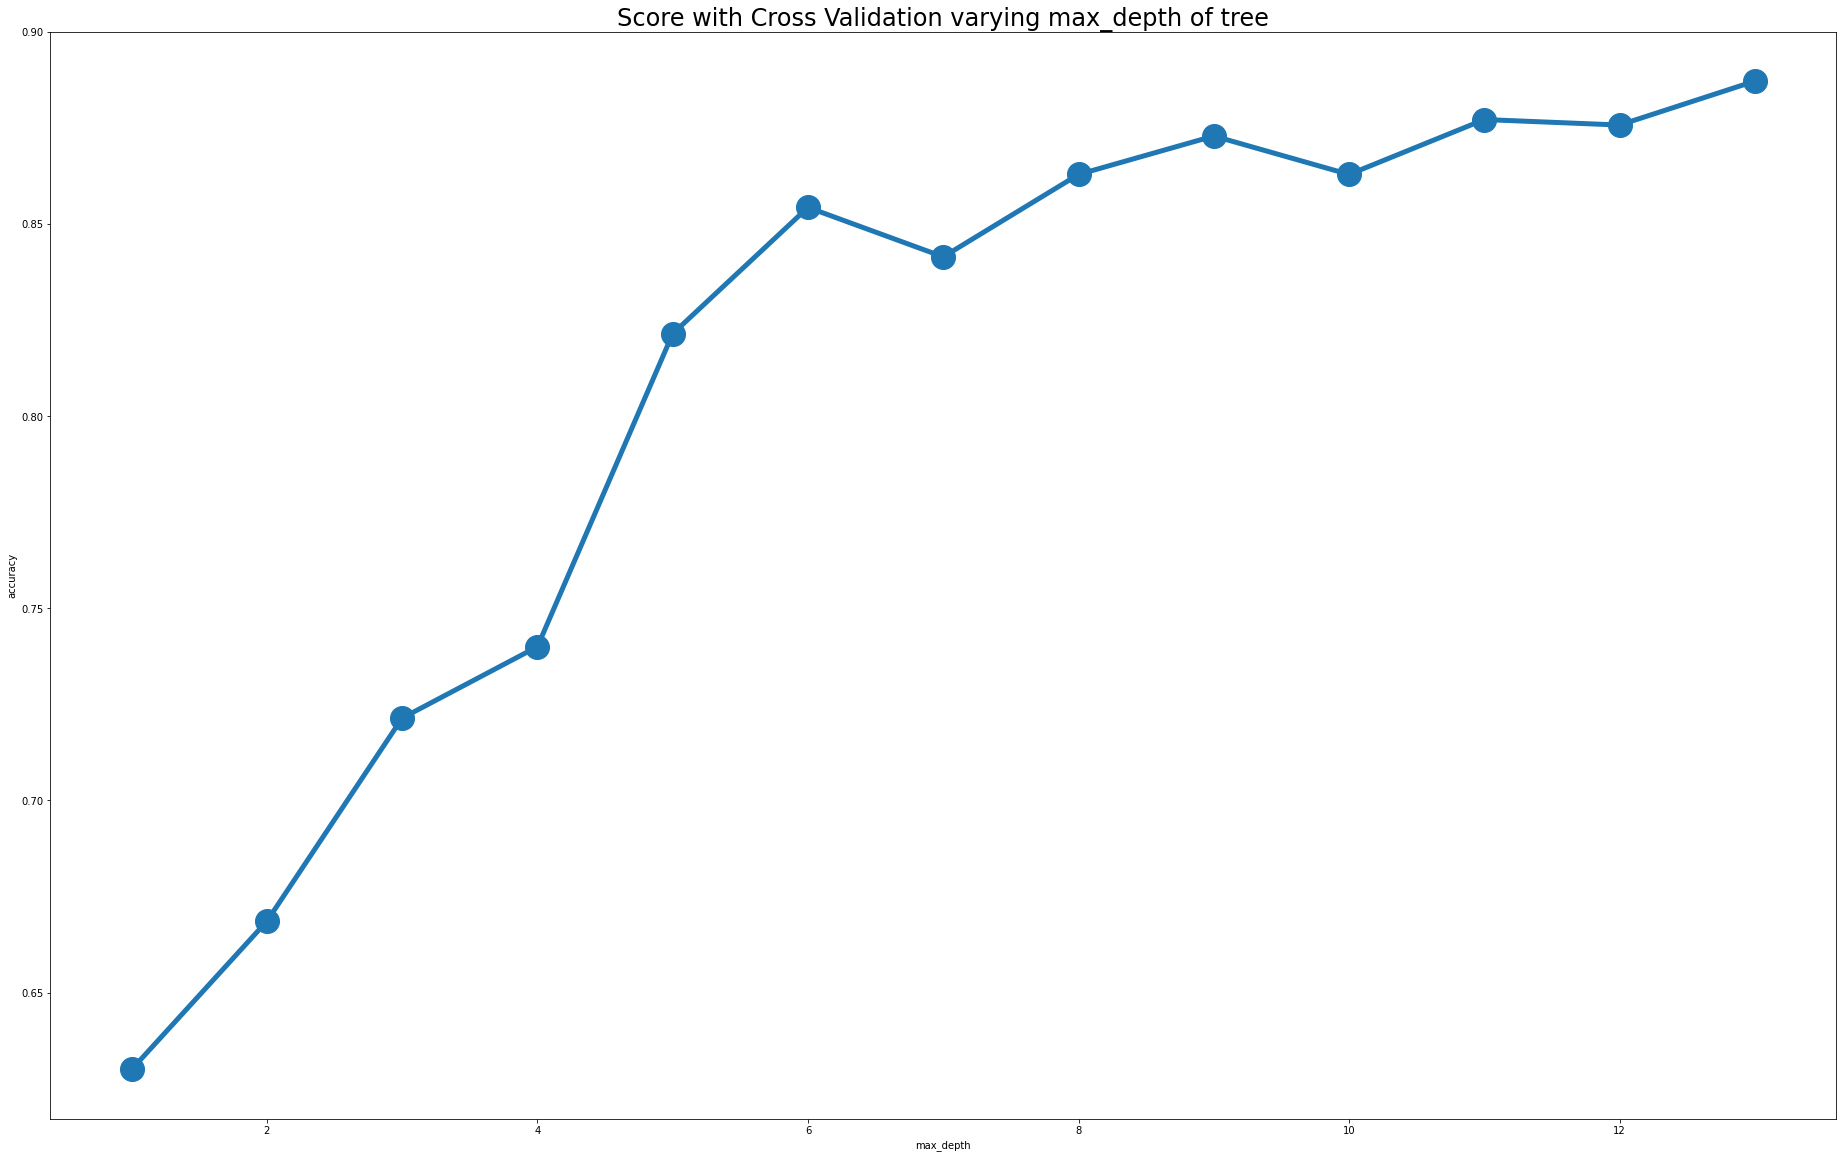

In [20]:
plt.figure(figsize=(32,20))
plt.plot(parameter_values, scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with Cross Validation varying max_depth of tree", fontsize = 24)
plt.show();

 ## A scatter plot of the test set using a pair of attributes of your choice with the class as colour

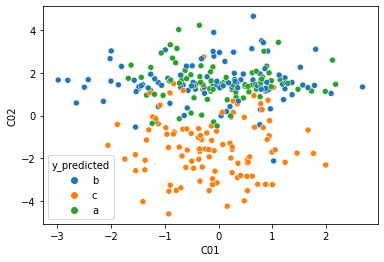

In [21]:
attributes = ['C01', 'C02']

# We want to plot the test set, so we need to add the target column
# to the dataframe in order to use it as hue
df_test = Xtest.assign(y_predicted = ytest_best_model)

sns.scatterplot(x = attributes[0], y = attributes[1], data = df_test, hue = 'y_predicted')

## and the good/bad prediction as the point style

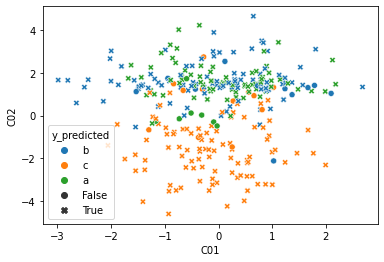

In [22]:
sns.scatterplot(x = attributes[0], y = attributes[1], data = df_test, hue = 'y_predicted', style = ytest == df_test['y_predicted'])